**KMean on Sepals Data (First two Columns)**

**Importing Libraries**

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Loading The Data Set**

In [2]:
iris = datasets.load_iris()
Task2_Data = pd.DataFrame(iris.data, columns=iris.feature_names)

**Data Information**

In [3]:
print("The Data set is shown as ")

Task2_Data.head()

The Data set is shown as 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print("The information of Data Set is ")

Task2_Data.info()

The information of Data Set is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
print("The Statistics Description of Data Set is ")

Task2_Data.describe()

The Statistics Description of Data Set is 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Pre Visualisation**

The Plot for Sepal Length vs Sepal Width is 


Text(0, 0.5, 'Sepal Width')

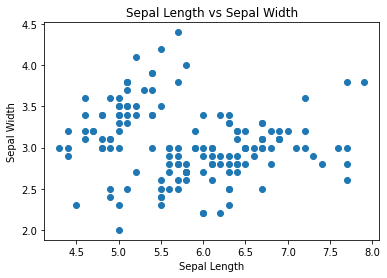

In [6]:
print("The Plot for Sepal Length vs Sepal Width is ")

plt.scatter(Task2_Data["sepal length (cm)"], Task2_Data["sepal width (cm)"])
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Hence, The above 2 Plots require optimum KMean value which will be calculated from Elbow Method  

**Elbow Method - Optimum K Value Calculation**

Hence, the elbow is pointed at the value 3 thus the optimum value of K is taken out as 3. Hence 3 clusters formation will take place for sepal length and sepal width data


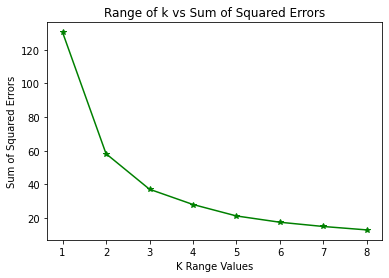

In [7]:
#for sepal length and sepal width data

k_range=range(1,9)
sse=[] #Sum of Squared Errors

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_predict(Task2_Data[['sepal length (cm)','sepal width (cm)']] )
    sse.append(km.inertia_)

plt.plot(k_range,sse, color="green", marker="*")
plt.title("Range of k vs Sum of Squared Errors")
plt.xlabel("K Range Values")
plt.ylabel("Sum of Squared Errors")

print("Hence, the elbow is pointed at the value 3 thus the optimum value of K is taken out as 3. Hence 3 clusters formation will take place for sepal length and sepal width data")

**Calculation of Centroid and Predicted Value**

In [8]:
#for sepal Width and sepal Length

km = KMeans(n_clusters=3) #As resulted from above 

y_predicted1=km.fit_predict(Task2_Data[['sepal length (cm)','sepal width (cm)']])

Task2_Data["cluster"]=y_predicted1
Task2_Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [9]:
print("The centroid of clusters are ")
km.cluster_centers_ 

The centroid of clusters are 


array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

**Post Visualization**

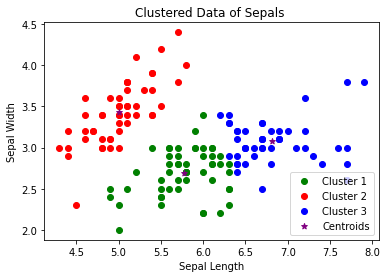

In [10]:
cluster_1 = Task2_Data[Task2_Data["cluster"]==0]
cluster_2 = Task2_Data[Task2_Data["cluster"]==1]
cluster_3 = Task2_Data[Task2_Data["cluster"]==2]

plt.scatter(cluster_1["sepal length (cm)"], cluster_1["sepal width (cm)"],color="green", label="Cluster 1" )
plt.scatter(cluster_2["sepal length (cm)"], cluster_2["sepal width (cm)"],color="red", label="Cluster 2")
plt.scatter(cluster_3["sepal length (cm)"], cluster_3["sepal width (cm)"],color="blue", label ="Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label="Centroids")

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Clustered Data of Sepals ")
plt.legend()